# Model Training

In [1]:
# Set root directory of the project as the current working directory
import os
initial_dir = os.getcwd()  # Save initial directory (notebooks/)
os.chdir('..')  # Move to project/

# Import necessary modules
from config.defaults import Config
from src.models import train_lstm_model, train_cnn_model, train_dt_model, train_lr_model, train_lasso_model
from src.utils import plot_training_history

# Load the default configuration
config = Config()

## MIT_Stanford

In [ ]:
config.use_aachen = False # Activate MIT_Stanford dataset

### LSTM

2025-04-09 22:35:18,461 - INFO - Loaded preprocessed data and metadata for lstm_regression with EOL 0.8
2025-04-09 22:35:18,461 - INFO - Input shape derived from X_train: (20, 1)
2025-04-09 22:35:18,557 - INFO - LSTM model built with tuned config: Config(project_name='Experiment1', data_path='data/Aachen/raw/Degradation_Prediction_Dataset_ISEA.mat', use_aachen=False, model_task='lstm_regression', eol_capacity=0.8, test_cell_count=3, random_state=42, log_transform=False, classification=False, seq_len=20, train_split_ratio=0.8, val_split_ratio=0.2, bins=[0, 200, 400, 600, inf], labels=['0-200', '200-400', '400-600', '600+'], batch_size=32, max_trials=20, tuning_epochs=50, tuner_directory='experiments/hyperparameter_tuning', lstm_units=48, lstm_dropout_rate=0.30000000000000004, lstm_dense_units=8, learning_rate=0.01, clipnorm=1.0, epochs=50, patience=20, conv1_filters=32, conv1_kernel_size=5, conv2_filters=64, conv2_kernel_size=3, conv3_filters=64, conv3_kernel_size=5, l2_reg=0.001, cnn_d

Loaded best hyperparameters from experiments/hyperparameter_tuning/mit_stanford/Experiment1_lstm_regression_tuning_eol80_best_params.json: {'lstm_units': 48, 'lstm_dropout_rate': 0.30000000000000004, 'lstm_dense_units': 8, 'learning_rate': 0.01, 'clipnorm': 1.0}
Epoch 1/50
409/428 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0221 - mae: 0.1066
Epoch 1: val_loss improved from inf to 0.01505, saving model to experiments/models/mit_stanford/lstm_regression_eol80_20250409_223518_best.keras
428/428 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0219 - mae: 0.1061 - val_loss: 0.0150 - val_mae: 0.0850
Epoch 2/50
428/428 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0160 - mae: 0.0894
Epoch 2: val_loss improved from 0.01505 to 0.01180, saving model to experiments/models/mit_stanford/lstm_regression_eol80_20250409_223518_best.keras
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0160 - mae: 0.0894 - val_loss: 0.0118 - val_mae: 0.0734
Epoch 3/50
425/428 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0130 

2025-04-09 22:36:14,721 - INFO - Final LSTM model saved to experiments/models/mit_stanford/lstm_regression_eol80_20250409_223518_final.keras


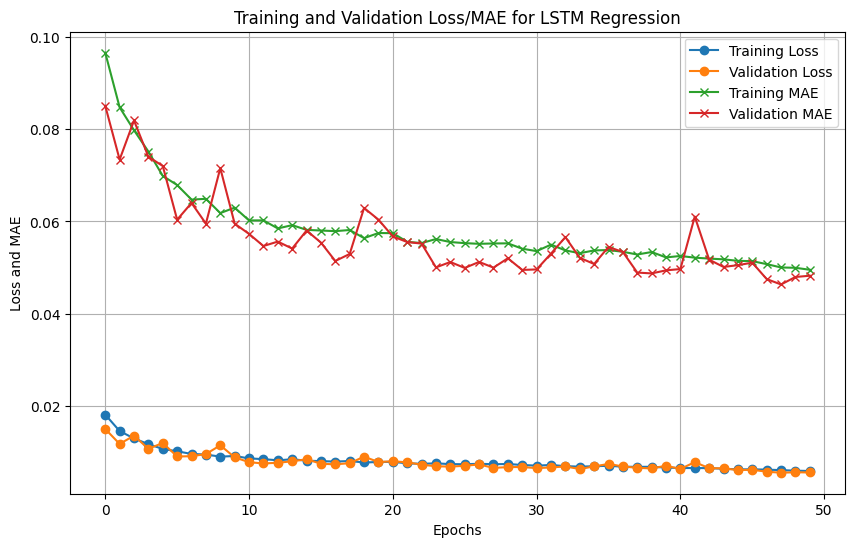

In [ ]:
config.model_task = "lstm_regression"
config.load_best_params()

lstm_model, history = train_lstm_model(config)

plot_training_history(history, config.model_task)

### CNN

Loaded best hyperparameters from experiments/hyperparameter_tuning/mit_stanford/Experiment1_cnn_classification_tuning_eol80_best_params.json: {'conv1_filters': 32, 'conv1_kernel_size': 5, 'l2_reg': 0.0001, 'conv2_filters': 32, 'conv2_kernel_size': 3, 'cnn_dense_units': 64, 'cnn_dropout_rate': 0.4, 'learning_rate': 0.0001}


2025-04-09 22:36:14,913 - INFO - Loaded preprocessed data and metadata for cnn_classification with EOL 0.8
2025-04-09 22:36:14,945 - INFO - CNN model built with tuned config: Config(project_name='Experiment1', data_path='data/Aachen/raw/Degradation_Prediction_Dataset_ISEA.mat', use_aachen=False, model_task='cnn_classification', eol_capacity=0.8, test_cell_count=3, random_state=42, log_transform=False, classification=False, seq_len=20, train_split_ratio=0.8, val_split_ratio=0.2, bins=[0, 200, 400, 600, inf], labels=['0-200', '200-400', '400-600', '600+'], batch_size=32, max_trials=20, tuning_epochs=50, tuner_directory='experiments/hyperparameter_tuning', lstm_units=48, lstm_dropout_rate=0.30000000000000004, lstm_dense_units=8, learning_rate=0.0001, clipnorm=1.0, epochs=50, patience=20, conv1_filters=32, conv1_kernel_size=5, conv2_filters=32, conv2_kernel_size=3, conv3_filters=64, conv3_kernel_size=5, l2_reg=0.0001, cnn_dense_units=64, cnn_dropout_rate=0.4, max_depth=None, min_samples_sp

Epoch 1/50
384/428 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.4108 - loss: 1.4179
Epoch 1: val_loss improved from inf to 1.13145, saving model to experiments/models/mit_stanford/cnn_classification_eol80_20250409_223614_best.keras
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4155 - loss: 1.4007 - val_accuracy: 0.4493 - val_loss: 1.1314
Epoch 2/50
422/428 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5507 - loss: 1.0197
Epoch 2: val_loss improved from 1.13145 to 0.87950, saving model to experiments/models/mit_stanford/cnn_classification_eol80_20250409_223614_best.keras
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5510 - loss: 1.0193 - val_accuracy: 0.6535 - val_loss: 0.8795
Epoch 3/50
398/428 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.6060 - loss: 0.9074
Epoch 3: val_loss improved from 0.87950 to 0.79516, saving model to experiments/models/mit_stanford/cnn_classification_eol80_20250409_223614_best.keras
428/428 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

2025-04-09 22:36:38,009 - INFO - Final CNN model saved to experiments/models/mit_stanford/cnn_classification_eol80_20250409_223614_final.keras


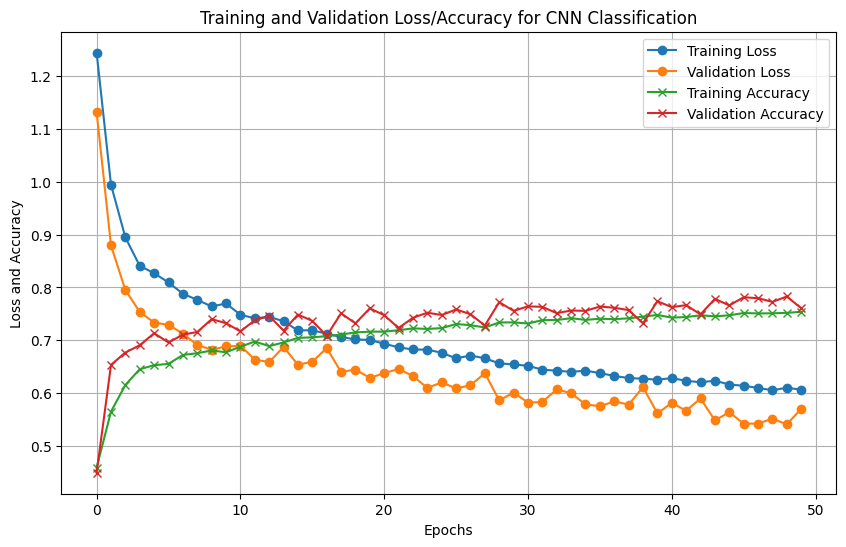

In [ ]:
config.model_task = "cnn_classification"
config.load_best_params()

cnn_model, history = train_cnn_model(config)

plot_training_history(history, config.model_task)

### DecisionTree Regressor

In [ ]:
config.model_task = "dt_regression" 
config.load_best_params()

dt_model = train_dt_model(config)

2025-04-10 12:49:08,745 - INFO - Loaded preprocessed data and metadata for dt_regression with EOL 0.8


Loaded best hyperparameters from experiments/hyperparameter_tuning/mit_stanford/Experiment1_dt_regression_tuning_eol80_best_params.json: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Linear Regression

In [ ]:
config.model_task = "lr_regression" 
config.load_best_params()

lr_model = train_lr_model(config)

2025-04-10 10:55:41,612 - INFO - Loaded preprocessed data and metadata for lr_regression with EOL 0.8


Loaded best hyperparameters from experiments/hyperparameter_tuning/mit_stanford/Experiment1_lr_regression_tuning_eol80_best_params.json: {'fit_intercept': True}


### Lasso Regression

In [ ]:
config.model_task = "lasso_regression" 
config.load_best_params()

lasso_model = train_lasso_model(config)

2025-04-10 10:55:42,919 - INFO - Loaded preprocessed data and metadata for lasso_regression with EOL 0.8


Loaded best hyperparameters from experiments/hyperparameter_tuning/mit_stanford/Experiment1_lasso_regression_tuning_eol80_best_params.json: {'alpha': 0.0001, 'max_iter': 5000, 'selection': 'cyclic', 'tol': 0.001}


## Aachen

In [2]:
config.use_aachen = True # Activate Aachen dataset

### LSTM

2025-04-22 10:02:34,550 - INFO - Loaded preprocessed data and metadata for lstm_regression with EOL 0.65
2025-04-22 10:02:34,551 - INFO - Input shape derived from X_train: (20, 1)


2025-04-22 10:02:34,636 - INFO - LSTM model built with tuned config: Config(project_name='Experiment1', data_path='data/Aachen/raw/Degradation_Prediction_Dataset_ISEA.mat', use_aachen=True, model_task='lstm_regression', eol_capacity=0.65, test_cell_count=3, random_state=42, log_transform=False, classification=False, seq_len=20, train_split_ratio=0.8, val_split_ratio=0.2, bins=[0, 200, 400, 600, inf], labels=['0-200', '200-400', '400-600', '600+'], batch_size=32, max_trials=20, tuning_epochs=50, tuner_directory='experiments/hyperparameter_tuning', epochs=100, lstm_units=64, lstm_dropout_rate=0.1, lstm_dense_units=16, learning_rate=0.001, clipnorm=1.5, patience=20, conv1_filters=32, conv1_kernel_size=5, conv2_filters=64, conv2_kernel_size=3, conv3_filters=64, conv3_kernel_size=5, l2_reg=0.001, cnn_dense_units=64, cnn_dropout_rate=0.5, max_depth=None, min_samples_split=2, min_samples_leaf=1, fit_intercept=True, alpha=0.001, max_iter=1000, tol=0.001, selection='cyclic')


Loaded best hyperparameters from experiments/hyperparameter_tuning/aachen/Experiment1_lstm_regression_tuning_eol65_best_params.json: {'lstm_units': 64, 'lstm_dropout_rate': 0.1, 'lstm_dense_units': 16, 'learning_rate': 0.001, 'clipnorm': 1.5}
Epoch 1/100
236/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0378 - mae: 0.1300
Epoch 1: val_loss improved from inf to 0.00443, saving model to experiments/models/aachen/lstm_regression_eol65_20250422_100234_best.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0363 - mae: 0.1269 - val_loss: 0.0044 - val_mae: 0.0558
Epoch 2/100
230/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044 - mae: 0.0524
Epoch 2: val_loss improved from 0.00443 to 0.00320, saving model to experiments/models/aachen/lstm_regression_eol65_20250422_100234_best.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0044 - mae: 0.0523 - val_loss: 0.0032 - val_mae: 0.0461
Epoch 3/100
240/250 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0037 - mae: 0.0471
Epoch 3: val_lo

2025-04-22 10:03:48,167 - INFO - Final LSTM model saved to experiments/models/aachen/lstm_regression_eol65_20250422_100234_final.keras


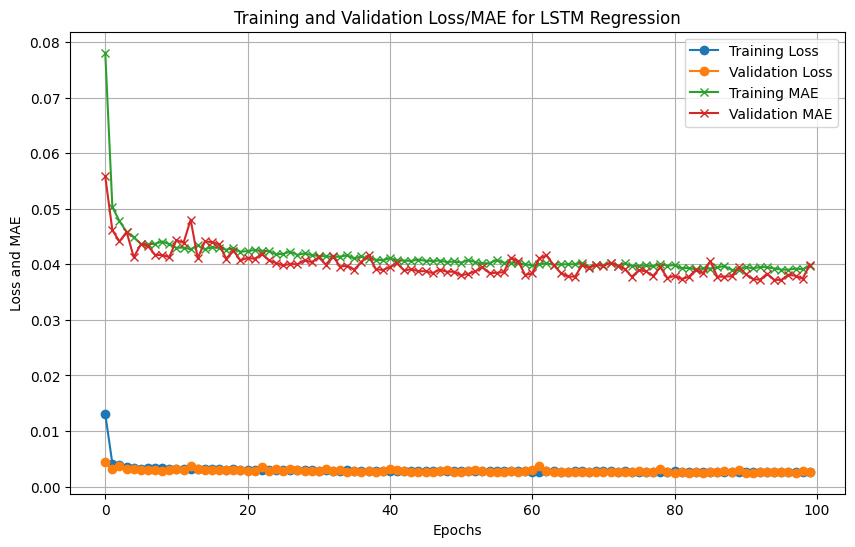

In [3]:
config.model_task = "lstm_regression"
config.load_best_params()

lstm_model, history = train_lstm_model(config)

plot_training_history(history, config.model_task)

### CNN

2025-04-22 10:03:48,328 - INFO - Loaded preprocessed data and metadata for cnn_classification with EOL 0.65


Loaded best hyperparameters from experiments/hyperparameter_tuning/aachen/Experiment1_cnn_classification_tuning_eol65_best_params.json: {'conv1_filters': 32, 'conv1_kernel_size': 5, 'l2_reg': 0.0001, 'conv2_filters': 48, 'conv2_kernel_size': 5, 'cnn_dense_units': 64, 'cnn_dropout_rate': 0.3, 'learning_rate': 0.001}


2025-04-22 10:03:48,417 - INFO - CNN model built with tuned config: Config(project_name='Experiment1', data_path='data/Aachen/raw/Degradation_Prediction_Dataset_ISEA.mat', use_aachen=True, model_task='cnn_classification', eol_capacity=0.65, test_cell_count=3, random_state=42, log_transform=False, classification=False, seq_len=20, train_split_ratio=0.8, val_split_ratio=0.2, bins=[0, 200, 400, 600, inf], labels=['0-200', '200-400', '400-600', '600+'], batch_size=32, max_trials=20, tuning_epochs=50, tuner_directory='experiments/hyperparameter_tuning', epochs=100, lstm_units=64, lstm_dropout_rate=0.1, lstm_dense_units=16, learning_rate=0.001, clipnorm=1.5, patience=20, conv1_filters=32, conv1_kernel_size=5, conv2_filters=48, conv2_kernel_size=5, conv3_filters=64, conv3_kernel_size=5, l2_reg=0.0001, cnn_dense_units=64, cnn_dropout_rate=0.3, max_depth=None, min_samples_split=2, min_samples_leaf=1, fit_intercept=True, alpha=0.001, max_iter=1000, tol=0.001, selection='cyclic')


Epoch 1/100
215/250 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.7880 - loss: 0.5312
Epoch 1: val_loss improved from inf to 1.37639, saving model to experiments/models/aachen/cnn_classification_eol65_20250422_100348_best.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7919 - loss: 0.5181 - val_accuracy: 0.5970 - val_loss: 1.3764
Epoch 2/100
221/250 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.8259 - loss: 0.4033
Epoch 2: val_loss improved from 1.37639 to 0.94290, saving model to experiments/models/aachen/cnn_classification_eol65_20250422_100348_best.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.8279 - loss: 0.3999 - val_accuracy: 0.7175 - val_loss: 0.9429
Epoch 3/100
222/250 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.8699 - loss: 0.3156
Epoch 3: val_loss improved from 0.94290 to 0.40750, saving model to experiments/models/aachen/cnn_classification_eol65_20250422_100348_best.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.8702 -

2025-04-22 10:04:12,845 - INFO - Final CNN model saved to experiments/models/aachen/cnn_classification_eol65_20250422_100348_final.keras


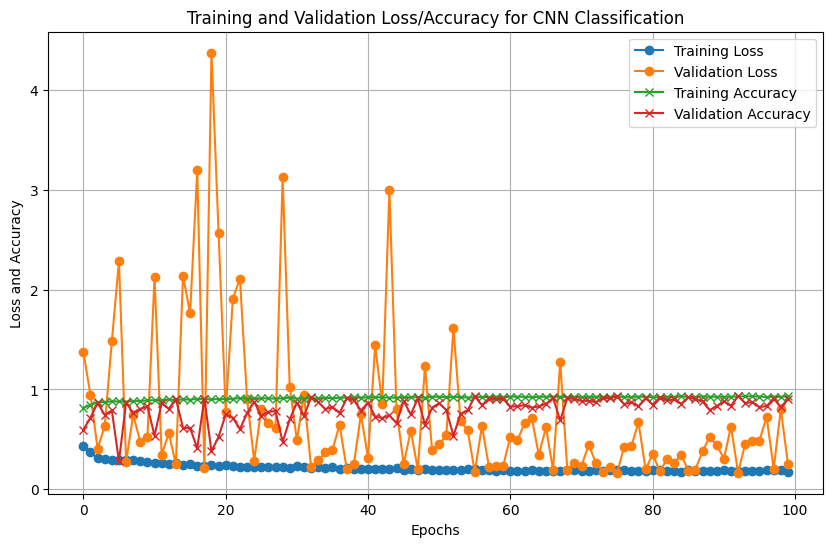

In [4]:
config.model_task = "cnn_classification"
config.load_best_params()

cnn_model, history = train_cnn_model(config)

plot_training_history(history, config.model_task)

### DecisionTree Regressor

In [5]:
config.model_task = "dt_regression" 
config.load_best_params()

dt_model = train_dt_model(config)

2025-04-22 10:04:12,990 - INFO - Loaded preprocessed data and metadata for dt_regression with EOL 0.65


Loaded best hyperparameters from experiments/hyperparameter_tuning/aachen/Experiment1_dt_regression_tuning_eol65_best_params.json: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Linear Regression

In [6]:
config.model_task = "lr_regression" 
config.load_best_params()

lr_model = train_lr_model(config)

2025-04-22 10:04:13,120 - INFO - Loaded preprocessed data and metadata for lr_regression with EOL 0.65


Loaded best hyperparameters from experiments/hyperparameter_tuning/aachen/Experiment1_lr_regression_tuning_eol65_best_params.json: {'fit_intercept': True}


### Lasso Regression

In [7]:
config.model_task = "lasso_regression" 
config.load_best_params()

lasso_model = train_lasso_model(config)

Loaded best hyperparameters from experiments/hyperparameter_tuning/aachen/Experiment1_lasso_regression_tuning_eol65_best_params.json: {'alpha': 0.0001, 'max_iter': 1000, 'selection': 'cyclic', 'tol': 0.0001}


2025-04-22 10:04:13,215 - INFO - Loaded preprocessed data and metadata for lasso_regression with EOL 0.65
